Logistic regression for diabetes dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../datasets/diabetes.csv')
x = df.drop("Outcome",axis=1)
y = df['Outcome']

In [3]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 101 ,stratify=y)

print(f"Training samples: {len(x_train)}")
print(f"Testing_samples: {len(x_test)}")

Training samples: 614
Testing_samples: 154


In [8]:
#Standardize insulin fit for train, transform both
scaler = StandardScaler()
x_train['Insulin'] = scaler.fit_transform(x_train[['Insulin']])
x_test['Insulin'] = scaler.transform(x_test[['Insulin']])

In [9]:
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [10]:
y_predict = model.predict(x_test)

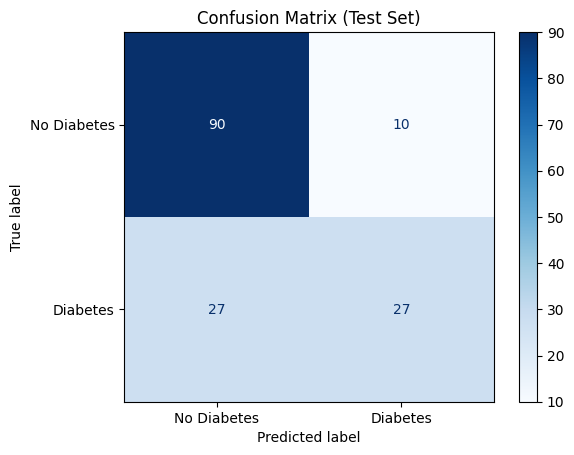

In [12]:
cm = confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(cm,display_labels = ['No Diabetes', 'Diabetes']).plot(cmap = "Blues")
plt.title("Confusion Matrix (Test Set)")
plt.show()


In [14]:
print("\n===Test Set Performance===")
print('\nClassification Report\n')
print(classification_report(y_test,y_predict))


===Test Set Performance===

Classification Report

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       100
           1       0.73      0.50      0.59        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.71       154
weighted avg       0.76      0.76      0.75       154



In [22]:
# Logistic REgresison Curve for Visualization
x_train_glucose = x_train[['Glucose']].copy()
x_test_glucose = x_test[['Glucose']].copy()

In [23]:
#Train separate single feature mdoel for visualization
model_glucose = LogisticRegression(max_iter=500)
model_glucose.fit(x_train_glucose, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [24]:
#Create a smooth curve
glucose_min = df['Glucose'].min()
glucose_max = df['Glucose'].max()
glucose_values = np.linspace(glucose_min,glucose_max, 200).reshape(-1,1)
y_curve = model_glucose.predict_proba(glucose_values)[:,1]

c:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


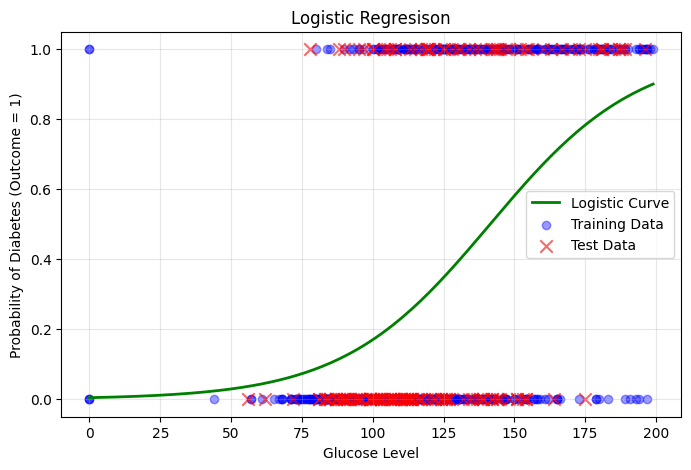

In [26]:
#Plot sigmoid curve with train/test split visualization

plt.figure(figsize = (8,5))
plt.plot(glucose_values, y_curve, color = 'green', linewidth = 2, label = "Logistic Curve")
plt.scatter(x_train_glucose, y_train, color = 'blue', alpha = 0.4, label = "Training Data")
plt.scatter(x_test_glucose, y_test, color = 'red', alpha = 0.6, marker = 'x', s = 80, label = 'Test Data')
plt.xlabel("Glucose Level")
plt.ylabel("Probability of Diabetes (Outcome = 1)")
plt.title("Logistic Regresison")
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()